In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import os
import time

from tensorflow import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

2023-10-17 13:59:13.719391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_97174/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [5]:
# transform Outlet_Establishment_Year to categorical variable
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

# label encode Outlet_Establishment_Year
le = preprocessing.LabelEncoder()
df['Outlet_Establishment_Year'] = le.fit_transform(df['Outlet_Establishment_Year'])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,4,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,8,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,4,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,3,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,4,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,8,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,4,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,3,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# creating dummy variables for categorical variables
df_encoded = pd.get_dummies(df)

df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,4,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,8,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,4,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,3,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
df_encoded.shape

(5000, 33)

In [10]:
scaler = MinMaxScaler()
df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,4,0.324387,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,8,0.035939,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,4,0.180863,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,3,0.061260,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,1,0.084247,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [11]:
X = df_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = df_encoded[['Item_Outlet_Sales']]

X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,4,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,8,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,4,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,3,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


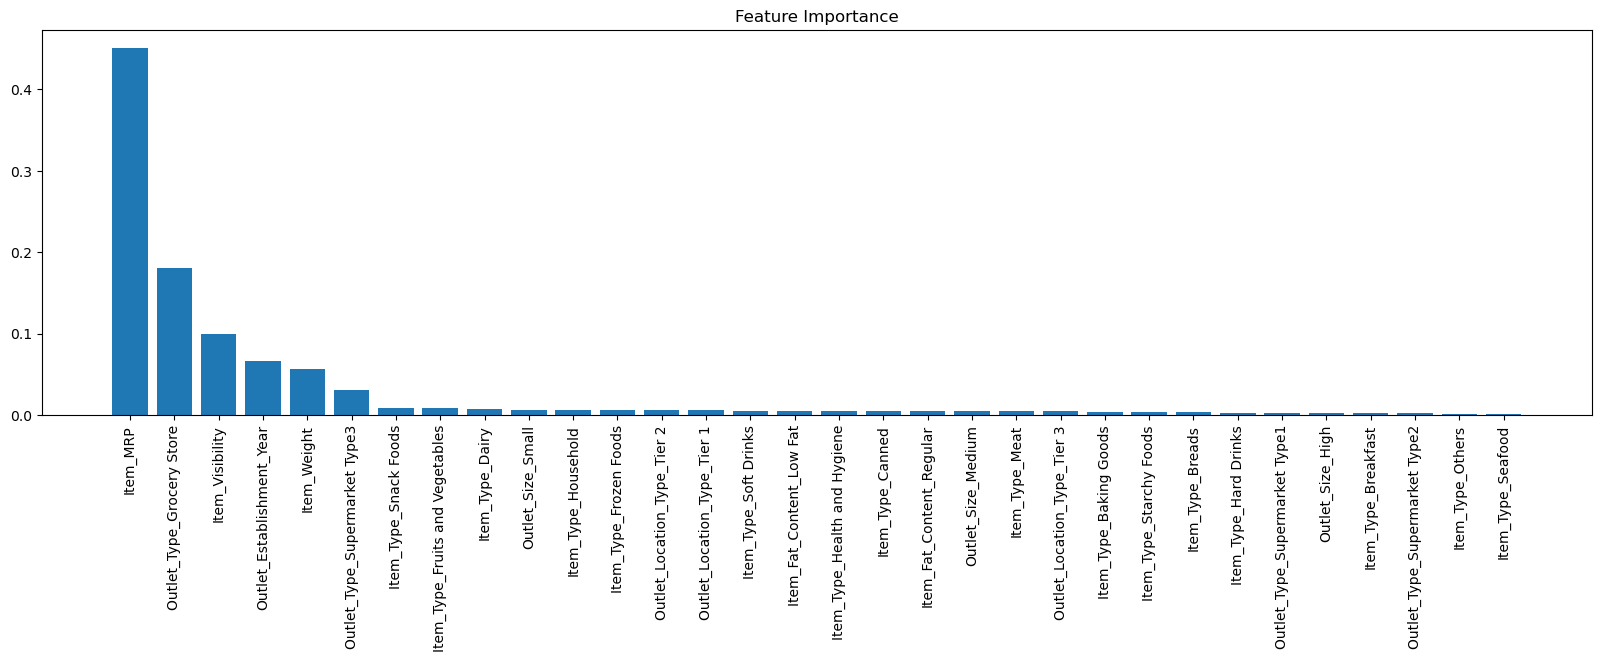

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Access feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [13]:
# print the names of the most important features
print(names[:10])

['Item_MRP', 'Outlet_Type_Grocery Store', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Weight', 'Outlet_Type_Supermarket Type3', 'Item_Type_Snack Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Dairy', 'Outlet_Size_Small']


In [14]:
X_selecTree = X[names[:5]]

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)  # Select the number of features you want
fit = rfe.fit(X, y)
X_selectedRegress = fit.transform(X)

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, k_features=8, forward=True, scoring='r2', cv=8)
sfs.fit(X, y)
X_selectedSeq = sfs.transform(X)

X_selectedSeq.shape


(5000, 8)

In [17]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.001)  # Adjust alpha as needed
lasso.fit(X, y)

# Use SelectFromModel to get selected features
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)
X_selected.shape

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(5000, 7)

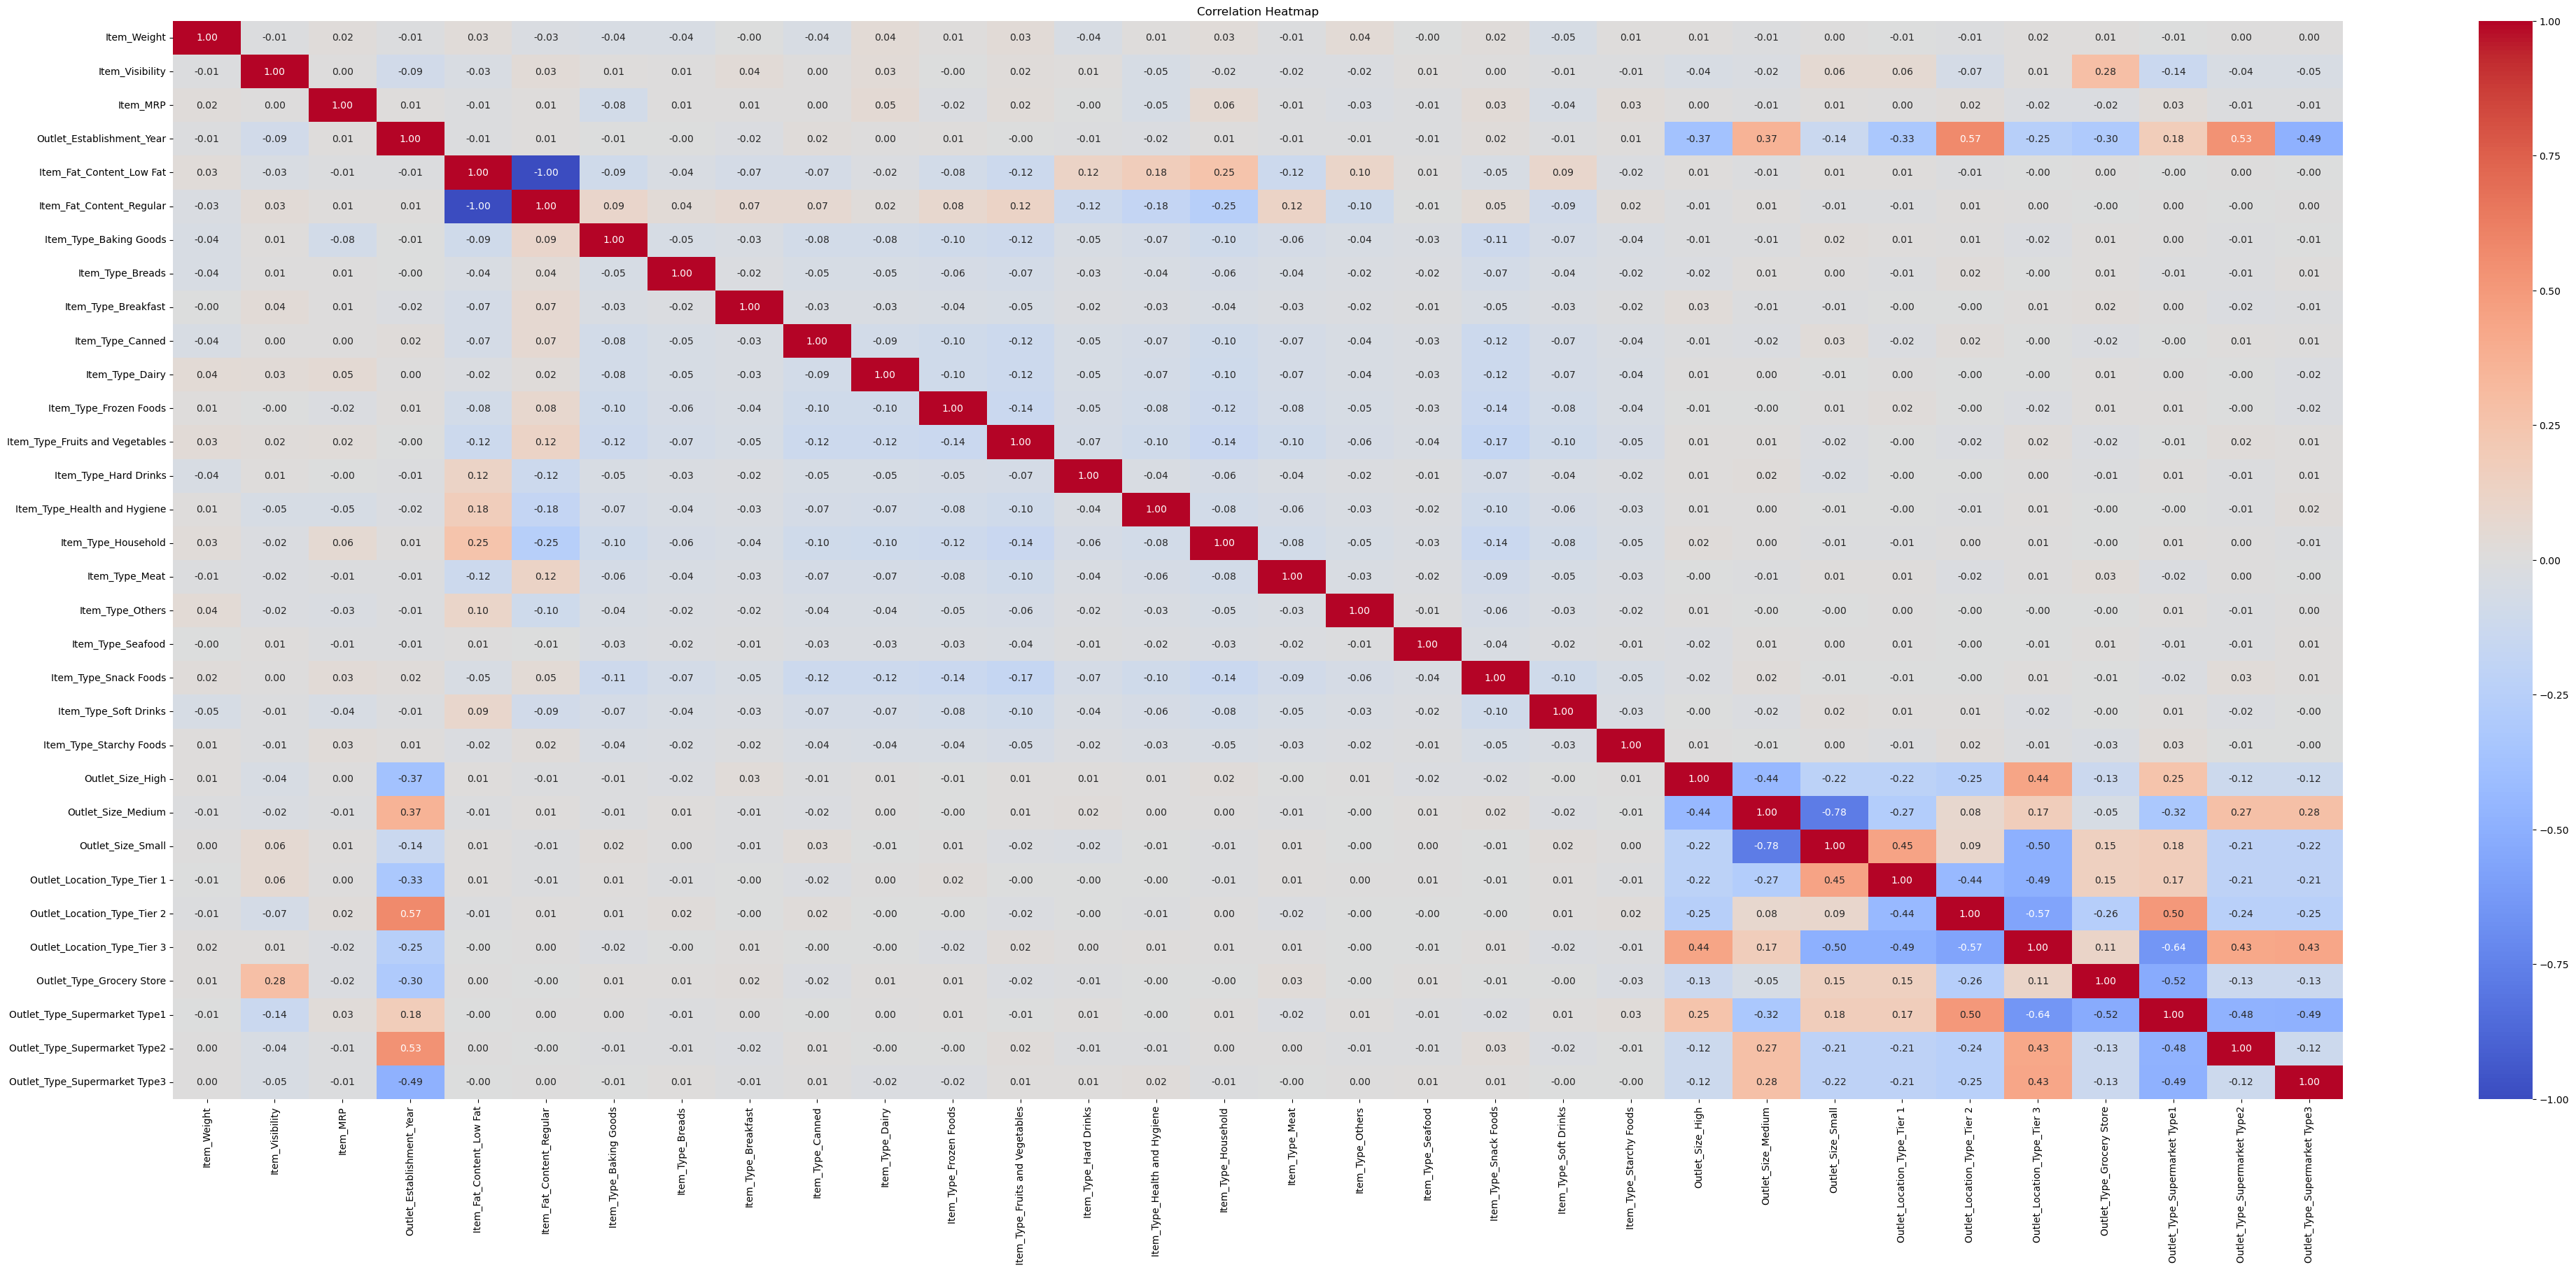

In [18]:
# # Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 7), (4000, 1)), ((1000, 7), (1000, 1)))

In [20]:
import os
import time

def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(InputLayer(input_shape=(inputNeurons)))
    for i in range(numHiddLayers):
        if i == 0:
            model.add(Dense(units=numNeurons, activation='relu'))
        model.add(Dense(units=numNeurons/2, activation='relu'))
    model.add(Dense(units=outputNeurons))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime]],
                            columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'epochs', 'r2Score', 'mse', 'loss', 'batchSize', 'runTime'])

    # save the log entry to CSV with header, and append new entries without rewriting the file, with only one header
    if not os.path.isfile('prob4_new_log.csv'):
        logEntry.to_csv('prob4_new_log.csv', index=False, header=True, mode='a')
    else:
        # Append without writing the header
        logEntry.to_csv('prob4_new_log.csv', index=False, header=False, mode='a')

    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    with tf.device('/GPU:0'):
        y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    start_time = time.time()
    
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    
    end_time = time.time()
    run_time = end_time - start_time
    
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, run_time)



Epoch 1/2000
4/4 [==============================] - 1s 82ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 2/2000
4/4 [==============================] - 0s 47ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 3/2000
4/4 [==============================] - 0s 54ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 4/2000
4/4 [==============================] - 0s 45ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 5/2000
4/4 [==============================] - 0s 38ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 6/2000
4/4 [==============================] - 0s 42ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 7/2000
4/4 [==============================] - 0s 42ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 8/2000
4/4 [==============================] - 0s 46ms/step - loss: 0.0344 - m

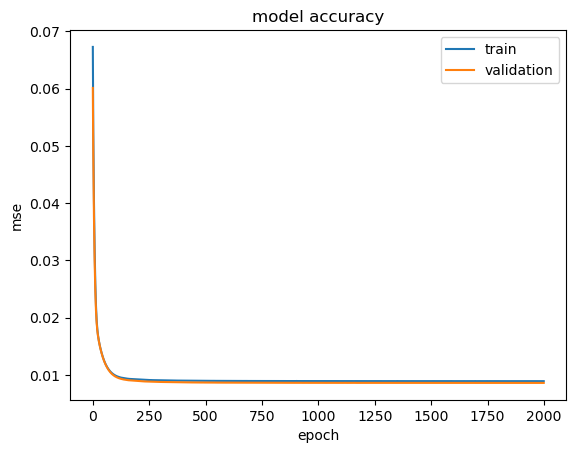

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,epochs,r2Score,mse,loss,batchSize,runTime
0,7,1,3,1024,0.00001,2000,0.612415,0.008592,0.008592,1024,301.598485


In [24]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=3, numNeurons=1024, learningRate=0.00001, epochs=2000, batchSize=1024)